# Agenda (12th March 2025)

* PDF Report Review of IBX Medical ASR Evaluation
* Recap of things from past week.
   * Reflection: Challenges, Observations, Questions?
   * e.g. Philosophy of Code-reusability, Extensibility.
   * Layered Software Architecture
   * An Appreciation for Design Patterns.
* **New**: Building up on the above, with famous software principles and appreciation of them with concrete examples (and counter-examples).

# Design Principles

Software Design Principles are **guidelines** that help developers create *scalable* and *maintainable* software. They aim to reduce **complexity** *(with exceptions ofcourse)*, improve **code reusability**, and prevent common pitfalls like **tight coupling** and **code duplication.**

Last time we looked at:

- Separation of Concerns (SoC)

**Definition**: SoC advocates for dividing a software system into distinct sections, each addressing a separate concern. This enhances modularity, reduces code duplication, and makes it easier to understand and maintain.

**Example**: In a web application, separating the user interface logic, business logic, and data access logic into different modules or layers.

**Counterexample**: A single class or module that handles all aspects of an application, such as user input, data processing, and database interaction. This can lead to a tightly coupled and difficult-to-maintain codebase.

## Single Responsibility Principle (SRP)

**Background**: The roots of SRP can be traced back to **Tom DeMarco** and **Meilir Page-Jones**, who discussed the concept of "**cohesion**" in software design in the 1970s and 1980s. Cohesion refers to how strongly related and focused the responsibilities of a module are.

The term SRP was coined by Robert C. Martin (Uncle Bob) and is based on the idea that a class should have only one reason to change, meaning it should be responsible for one piece of functionality

---

**Definition**: Every module or class should have responsibility over a single part of the functionality provided by the software, and that responsibility should be entirely encapsulated by the class.

**Example**: In this example, we apply the Single Responsibility Principle (SRP) by creating separate classes for each responsibility:

`UserAuthentication` handles user authentication.
`EmailService` is responsible for sending emails.
`PaymentProcessor` manages payment processing.
Each class encapsulates only one concern, making the system more modular, easier to maintain, and simpler to test.

In [ ]:
# Example (SRP-compliant):

class UserAuthentication:
    """Handles user authentication."""
    def login(self, username, password):
        # Logic for authenticating user
        print(f"User {username} logged in successfully.")
        return True

class EmailService:
    """Handles email sending."""
    def send_email(self, recipient, subject, body):
        # Logic for sending email
        print(f"Email sent to {recipient} with subject: {subject}")

class PaymentProcessor:
    """Handles payment processing."""
    def process_payment(self, user, amount):
        # Logic for processing payment
        print(f"Processed payment of ${amount} for {user}.")


In this anti-pattern, the `UserManager` class violates SRP by handling:

* User authentication
* Sending emails
* Processing payments

By **mixing responsibilities**, the class becomes **tightly coupled**, making it difficult to modify or extend without breaking other functionality.

In [ ]:
class UserManager:
    """Handles multiple responsibilities, violating SRP."""
    def login(self, username, password):
        print(f"User {username} logged in successfully.")
        return True

    def send_email(self, recipient, subject, body):
        print(f"Email sent to {recipient} with subject: {subject}")

    def process_payment(self, user, amount):
        print(f"Processed payment of ${amount} for {user}.")


* Harder to maintain: If we need to modify the authentication process, we might accidentally break email or payment processing.
* Difficult to test: Unit testing this class requires handling multiple unrelated functionalities.
* Poor scalability: If we want to change the email service (e.g., switch to an external API), we would have to modify the entire class, leading to unnecessary dependencies.

## Open/Closed Principle (OCP)

**Background:** Introduced by Bertrand Meyer, a Swiss computer scientist, in 1988 in his book *Object-Oriented Software Construction*.

Meyer stated:

> “A module should be open for extension but closed for modification.”

**Definition:** Software entities (classes, modules, functions, etc.) should be open for extension but closed for modification.

This means that new functionality should be added by extending existing code, rather than modifying it.

The key to adding new functionality without modifying existing code lies in **abstraction**, **inheritance**, and **composition**.

This principle helps maintain code **stability**, preventing unintended side effects when new features are introduced.

In [ ]:
from abc import ABC, abstractmethod

# Abstract class defining a discount strategy (Open for extension)
class DiscountStrategy(ABC):
    @abstractmethod
    def apply_discount(self, amount):
        pass

# Concrete discount strategies (New ones can be added without modifying existing code)
class NoDiscount(DiscountStrategy):
    def apply_discount(self, amount):
        return amount

class SeasonalDiscount(DiscountStrategy):
    def apply_discount(self, amount):
        return amount * 0.9  # 10% discount

class BlackFridayDiscount(DiscountStrategy):
    def apply_discount(self, amount):
        return amount * 0.7  # 30% discount

# Order class depends on DiscountStrategy, not specific discount implementations
class Order:
    def __init__(self, amount, discount_strategy: DiscountStrategy):
        self.amount = amount
        self.discount_strategy = discount_strategy

    def get_total(self):
        return self.discount_strategy.apply_discount(self.amount)

# Usage
order1 = Order(100, NoDiscount())
order2 = Order(100, SeasonalDiscount())
order3 = Order(100, BlackFridayDiscount())

print(order1.get_total())  # 100 (No discount)
print(order2.get_total())  # 90 (10% discount)
print(order3.get_total())  # 70 (30% discount)

100
90.0
70.0


**Benefits:**

* Open for extension - We can add new discount types (e.g., `VIPDiscount`) without modifying existing classes.
* Closed for modification - `Order` does not need to change when new discount strategies are introduced.
* More flexible - The system can be extended dynamically by injecting different strategies.

Here, the `Order` class directly implements discount logic, requiring modifications each time a new discount type is introduced.

In [ ]:
class Order:
    def __init__(self, amount, discount_type):
        self.amount = amount
        self.discount_type = discount_type

    def get_total(self):
        if self.discount_type == "no_discount":
            return self.amount
        elif self.discount_type == "seasonal":
            return self.amount * 0.9  # 10% discount
        elif self.discount_type == "black_friday":
            return self.amount * 0.7  # 30% discount
        else:
            raise ValueError("Unknown discount type")

# Usage
order1 = Order(100, "no_discount")
order2 = Order(100, "seasonal")
order3 = Order(100, "black_friday")

print(order1.get_total())  # 100
print(order2.get_total())  # 90
print(order3.get_total())  # 70

100
90.0
70.0


* Modifications required for new features, Every time a new discount type is added, we must modify `get_total()`.
* Increased risk of bugs - Adding a new condition could accidentally break existing logic.
* Difficult to test and maintain - `Order` should focus on order-related tasks, not discount logic.

## Liskov Substitution Principle (LSP)

**Background**: comes from Barbara Liskov, an American computer scientist, who introduced the concept in 1987 in her keynote speech at a conference on Data Abstraction and Hierarchy.


> Barbara Liskov formulated this principle as part of her work on data abstraction and type theory, stating:
> “*If for each object o1 of type S, there is an object o2 of type T such that for all programs P defined in terms of T, the behavior of P is unchanged when o1 is substituted for o2, then S is a subtype of T.*”

> This means that subtypes must be replaceable for their base types without altering the correctness of the program.

---

**Definition**: Subtypes should be substitutable for their base types without altering the correctness of the program. This means that if a function expects a base type, it should be able to work with any subtype without unexpected behavior.

In [ ]:
from abc import ABC, abstractmethod

class Document(ABC):
    @abstractmethod
    def open(self):
        pass

class SavableDocument(Document):
    @abstractmethod
    def save(self):
        pass

class ReadonlyDocument(Document):
    def open(self):
        print("Opening readonly document")

class WritableDocument(SavableDocument):
    def open(self):
        print("Opening writable document")

    def save(self):
        print("Saving document")

# Client code
def process_document(document: Document):
    document.open()
    # ... other document processing logic ...
    if isinstance(document, SavableDocument): # if document is of type SavableDocument, it must have the save() method.
        document.save()

writable_doc = WritableDocument()
process_document(writable_doc)  # This works fine

readonly_doc = ReadonlyDocument()
process_document(readonly_doc)  # This also works fine, the save operation would be ignored without raising errors

**Violation of LSP:**

If the `ReadonlyDocument` class inherits the `save()` method from `Document` and throws an exception when it's called, it violates the LSP. This is because a client expecting a `Document` object (which should be able to be saved) would break if it encounters a `ReadonlyDocument` object

**Solution (Adhering to LSP):**

To adhere to the LSP, you could separate the saving capability into a different interface or abstract class, like `SavableDocument`. Only documents that can actually be saved (`Document`, `WritableDocument`) would implement this interface. The `ReadonlyDocument` class would not implement this interface, indicating its read-only nature.

## Interface Segregation Principle (ISP)
**Background**: Robert C. Martin (Uncle Bob) formulated ISP in the early 2000s, particularly in his book *Agile Software Development: Principles, Patterns, and Practices*.

The principle was introduced to address issues with large, bloated interfaces that force implementing classes to define methods they don't actually need.

> “Clients should not be forced to depend on interfaces they do not use.”

This means that instead of having one large interface that all classes must implement, it is better to **create multiple smaller, more specific interfaces** that clients only need to implement as required.

**Definition**: The Interface Segregation Principle states that a class **should not be forced to implement interfaces it does not use**. Instead of having **large, general-purpose interfaces**, break them down into **smaller, specific interfaces**.

In this example, we design an **e-commerce payment system** where different payment methods have different capabilities:
- **CreditCardProcessor** supports payments and refunds.
- **CryptoProcessor** only supports payments (no refunds due to blockchain restrictions).

In [ ]:
from abc import ABC, abstractmethod

# Segregated interfaces for different payment functionalities
class PaymentProcessor(ABC):
    @abstractmethod
    def process_payment(self, amount):
        pass

class RefundProcessor(ABC):
    @abstractmethod
    def process_refund(self, amount):
        pass

# Credit Card supports both payments and refunds
class CreditCardProcessor(PaymentProcessor, RefundProcessor):
    def process_payment(self, amount):
        print(f"Processing credit card payment of ${amount}")

    def process_refund(self, amount):
        print(f"Processing credit card refund of ${amount}")

# Crypto payments support only payments (no refunds)
class CryptoProcessor(PaymentProcessor):
    def process_payment(self, amount):
        print(f"Processing crypto payment of ${amount}")

# Usage
credit_card = CreditCardProcessor()
crypto = CryptoProcessor()

credit_card.process_payment(100)
credit_card.process_refund(50)  # Works because CreditCardProcessor implements RefundProcessor

crypto.process_payment(200)
# crypto.process_refund(100)  # This would raise an error since CryptoProcessor does not implement RefundProcessor

Processing credit card payment of $100
Processing credit card refund of $50
Processing crypto payment of $200


**Benefits:**

* Each class only implements relevant methods: `CryptoProcessor` does not need to implement `process_refund()`, because crypto payments typically do not allow refunds.
* Prevents unnecessary dependencies: A future `BankTransferProcessor` could implement only the interfaces it needs, without being forced to support refunds or crypto-specific features.
* Encapsulates functionality properly: `PaymentProcessor` handles payments, and `RefundProcessor` handles refunds, keeping concerns separate.

All of this encourages modular, flexible design by keeping interfaces **focused and cohesive**.


Here, a single large `PaymentGateway` interface forces all payment processors to implement refund functionality, even if it's not applicable.

Why This Violates ISP?
* Forces unnecessary implementations: `CryptoProcessor` is required to implement `process_refund()`, even though it is not applicable.
* Leads to runtime errors: The `NotImplementedError` is a code smell and indicates poor design.
* Difficult to extend: If new payment methods (e.g., **Buy Now, Pay Later**) are added, they will need to conform to an interface that might not be relevant.


In [ ]:
class PaymentGateway:
    def process_payment(self, amount):
        print(f"Processing payment of ${amount}")

    def process_refund(self, amount):
        print(f"Processing refund of ${amount}")

# Credit card processor works fine
class CreditCardProcessor(PaymentGateway):
    def process_payment(self, amount):
        print(f"Processing credit card payment of ${amount}")

    def process_refund(self, amount):
        print(f"Processing credit card refund of ${amount}")

# Crypto processor is forced to implement refund, even though it's not supported
class CryptoProcessor(PaymentGateway):
    def process_payment(self, amount):
        print(f"Processing crypto payment of ${amount}")

    def process_refund(self, amount):
        raise NotImplementedError("Refunds not supported for crypto transactions")

# Usage
credit_card = CreditCardProcessor()
crypto = CryptoProcessor()

credit_card.process_payment(100)
credit_card.process_refund(50)  # Works as expected

crypto.process_payment(200)
crypto.process_refund(100)  # Raises an error: Refunds not supported

## Dependency Inversion Principle (DIP)

**Background**: The DIP was introduced by Robert C. Martin (Uncle Bob) in the 1990s, as part of the SOLID principles.

In his 1996 paper *The Dependency Inversion Principle*, he described the need for software architectures that are flexible, maintainable, and loosely coupled, ensuring that high-level logic is not dictated by low-level implementation details.

> “High-level modules should not depend on low-level modules. Both should depend on abstractions.”

By "inverting" dependencies - that is reversing the traditional dependency direction, we make systems easier to extend and test, leading to better software design.

To summarize:

* High-level modules should not depend on low-level modules. Both should depend on abstractions.
* Abstractions should not depend on details. Details should depend on abstractions.



Imagine an *order processing system* where the `OrderService` depends on a `PaymentProcessor`.
Instead of tightly coupling OrderService to a specific payment implementation (e.g., `PayPalProcessor`), we introduce an abstraction (`PaymentProcessor` interface).

In [ ]:
from abc import ABC, abstractmethod

# Abstract Payment Processor Interface (Abstraction)
class PaymentProcessor(ABC):
    @abstractmethod
    def process_payment(self, amount):
        pass

# Concrete implementation for PayPal
class PayPalProcessor(PaymentProcessor):
    def process_payment(self, amount):
        print(f"Processing PayPal payment of ${amount}")

# Concrete implementation for Stripe
class StripeProcessor(PaymentProcessor):
    def process_payment(self, amount):
        print(f"Processing Stripe payment of ${amount}")

# OrderService depends on abstraction, not concrete implementations
class OrderService:
    def __init__(self, payment_processor: PaymentProcessor):
        self.payment_processor = payment_processor

    def checkout(self, amount):
        print("Checking out order...")
        self.payment_processor.process_payment(amount)

# Usage
paypal = PayPalProcessor()
order1 = OrderService(paypal)
order1.checkout(100)

stripe = StripeProcessor()
order2 = OrderService(stripe)
order2.checkout(200)

Here, `OrderService` is tightly coupled to `PayPalProcessor`.

* If we want to switch to `StripeProcessor`, we must modify `OrderService`, violating `Open/Closed Principle` too.
* We cannot easily introduce new payment methods without changing existing code.
* Furthermore,  this is difficult to test, since we cannot easily mock or substitute a different payment method.

In [ ]:
class PayPalProcessor:
    def process_payment(self, amount):
        print(f"Processing PayPal payment of ${amount}")

class OrderService:
    def __init__(self):
        self.payment_processor = PayPalProcessor()  # Direct dependency on PayPal

    def checkout(self, amount):
        print("Checking out order...")
        self.payment_processor.process_payment(amount)

# Usage
order = OrderService()
order.checkout(100)


Checking out order...
Processing PayPal payment of $100


# Design Patterns



## Strategy Pattern

### Definition

The **Strategy** pattern is a behavioral design pattern because it focuses on how objects interact and **delegate** responsibilities *dynamically*. It enables an object's behavior to be selected at runtime by encapsulating algorithms in **separate** strategy classes and allowing them to be interchangeable.


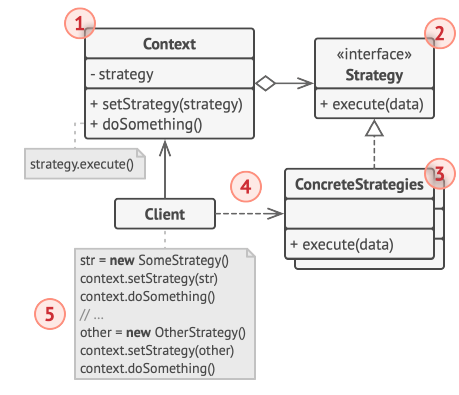

1. The **Context** holds a reference to a specific Strategy and interacts with it exclusively through the strategy interface.
2. The **Strategy** interface is shared among all concrete strategies and defines a method that the Context calls to execute a strategy.
3. **Concrete Strategies** implement different variations of the algorithm that the Context relies on.
4. Whenever the **Context** needs to execute the algorithm, it invokes the method on the assigned strategy object without knowing its exact type or implementation details.
5. The **Client** instantiates a specific strategy and assigns it to the Context. The **Context** provides a setter method, allowing the client to switch strategies dynamically at runtime.

### Tips

Use the pattern:
* When you have a lot of similar classes that
only differ in the way they execute some behavior.
* To isolate the business logic of a class from
the implementation details of algorithms that may not be as
important in the context of that logic.
* When your class has a massive conditional
operator that switches between different variants of the same
algorithm.

### Pros & Cons

* You can swap algorithms used inside an object at runtime, e.g. switching behavior at run-time without modifying code.
* *Open/Closed Principle*. You can introduce new strategies with-
out having to change the context.
* You can replace inheritance with composition.
* If you only have a couple of algorithms and they rarely change,
there's no real reason to overcomplicate the program with new
classes and interfaces that come along with the pattern.

### Thoughts

* The `Decorator` pattern lets you change the skin of an object, while `Strategy`
lets you change the guts.
* The `State` pattern can be seen as an extension of the `Strategy` pattern. Both rely on composition, modifying a context's behavior by delegating tasks to helper objects. However, while `Strategy` ensures complete independence between its variations, `State` allows concrete states to be aware of and influence each other, enabling dynamic transitions within the context

### Code Example

#### **Stochastic Gradient Descent (SGD)**

SGD updates the weights (Θ) using the gradient \( ∇ J(Θ) \) of the loss function \( J \):

$$
\theta_{t+1} = \theta_t - \eta \cdot \nabla J(\theta_t)
$$

#### **Root Mean Square Propagation (RMSprop)**

RMSprop maintains a moving average of squared gradients:

$$
v_t = \beta v_{t-1} + (1 - \beta) (\nabla J(\theta_t))^2
$$

$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{v_t + \epsilon}} \cdot \nabla J(\theta_t)
$$

####  **Adaptive Moment Estimation (Adam)**

Adam combines **SGD** and **RMSprop**.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Strategy Interface
class OptimizerStrategy:
    def get_optimizer(self, model):
        raise NotImplementedError("Subclasses must implement get_optimizer")

# Concrete Strategies
class SGDStrategy(OptimizerStrategy):
    def get_optimizer(self, model):
        return optim.SGD(model.parameters(), lr=0.01)

class AdamStrategy(OptimizerStrategy):
    def get_optimizer(self, model):
        return optim.Adam(model.parameters(), lr=0.001)

class RMSpropStrategy(OptimizerStrategy):
    def get_optimizer(self, model):
        return optim.RMSprop(model.parameters(), lr=0.001)

# A Simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)

# Context (Trainer)
class Trainer:
    def __init__(self, optimizer_strategy: OptimizerStrategy):
        self.optimizer_strategy = optimizer_strategy

    def train(self, model, train_loader, epochs=5):
        criterion = nn.MSELoss()
        optimizer = self.optimizer_strategy.get_optimizer(model)

        for epoch in range(epochs):
            total_loss = 0
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

            print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# Dummy Dataset
X = torch.rand(100, 1)  # 100 samples, 1 feature
Y = 2 * X + 1 + 0.1 * torch.randn(100, 1)  # Linear relation with noise

dataset = TensorDataset(X, Y)
train_loader = DataLoader(dataset, batch_size=10, shuffle=True)

# Testing different strategies
model = SimpleNN(input_size=1, output_size=1)

print("Training with SGD:")
sgd_trainer = Trainer(SGDStrategy())
sgd_trainer.train(model, train_loader)

print("\nTraining with Adam:")
adam_trainer = Trainer(AdamStrategy())
adam_trainer.train(model, train_loader)

print("\nTraining with RMSprop:")
rmsprop_trainer = Trainer(RMSpropStrategy())
rmsprop_trainer.train(model, train_loader)


Training with SGD:
Epoch 1, Loss: 26.5735
Epoch 2, Loss: 17.0612
Epoch 3, Loss: 11.3617
Epoch 4, Loss: 7.9397
Epoch 5, Loss: 5.8759

Training with Adam:
Epoch 1, Loss: 5.0168
Epoch 2, Loss: 4.8701
Epoch 3, Loss: 4.7455
Epoch 4, Loss: 4.6141
Epoch 5, Loss: 4.4828

Training with RMSprop:
Epoch 1, Loss: 4.1151
Epoch 2, Loss: 3.7759
Epoch 3, Loss: 3.5908
Epoch 4, Loss: 3.4516
Epoch 5, Loss: 3.3471


**Inner Loop Explanation:**
 through mini-batches of training data:

 ```python
 for inputs, targets in train_loader:
 ...
 ```
* Reset gradients.
* Perform forward pass (compute predictions).
* Compute loss.
* Perform backward pass (compute gradients).
* Update model parameters using optimizer.

## Decorator Pattern (AKA Wrapper)





### Definition

Decorator is a *structural* design pattern when you need to dynamically extend the functionality of objects at runtime without modifying their underlying structure. It provides an alternative to subclassing by allowing behavior to be added flexibly through composition.

* You want to add responsibilities to individual objects rather than an entire class.
* You need to add or modify functionality dynamically at runtime.
* You want to keep your class structure open for extension but closed for modification (following the **Open/Closed** Principle from **SOLID**).

### Tips

* Use the pattern when it's awkward or not possible to extend
an object's behavior using inheritance
* When you need to be able to assign
extra behaviors to objects at runtime without breaking the
code that uses these objects.

### Pros & Cons

* Decorator enhances an object without changing its interface
* You can add or remove responsibilities from an object at
runtime.
* *Open/Closed Principle*: You can introduce new types of products
into the program without breaking existing client code
* *Single Responsibility Principle*: You can divide a monolithic class
that implements many possible variants of behavior into several smaller classes.
* The order of executing the decorators matters, which may not be suitable, in case of mutating values.



### Code Example

Here we define a basic PyTorch model (MLP) for binary classification.

We use the Decorator Pattern to:
* Time the training process (`TimerDecorator`).
* Apply input normalization (`NormalizerDecorator`).

This achieves extending functionality without modifying the original model class. The model class remains focused on neural network functionality, while decorators handle logging and preprocessing.

In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define a simple PyTorch model (MLP)
class MLPModel(nn.Module):
    def __init__(self, input_dim):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.output_activation(self.fc3(x))
        return x

    def train_model(self, X, y, epochs=10, lr=0.01):
        """Train the model using binary cross-entropy loss."""
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.parameters(), lr=lr)

        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = self.forward(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            if epoch % 5 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

        print("Training complete.")

    def predict(self, X):
        """Make predictions."""
        with torch.no_grad():
            outputs = self.forward(X)
            return (outputs > 0.5).float()

# Decorator for measuring training time
class TimerDecorator:
    def __init__(self, model):
        self.model = model

    def train_model(self, X, y, epochs=10, lr=0.01):
        start_time = time.time()
        self.model.train_model(X, y, epochs, lr)
        end_time = time.time()
        print(f"Training time: {end_time - start_time:.4f} seconds")

    def predict(self, X):
        return self.model.predict(X)

# Decorator for normalizing input data
class NormalizerDecorator:
    def __init__(self, model):
        self.model = model
        self.scaler = StandardScaler()

    def train_model(self, X, y, epochs=10, lr=0.01):
        X_np = X.numpy()  # Convert tensor to NumPy for scaling
        X_scaled = self.scaler.fit_transform(X_np)
        X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32)
        self.model.train_model(X_scaled_tensor, y, epochs, lr)

    def predict(self, X):
        X_np = X.numpy()
        X_scaled = self.scaler.transform(X_np)
        X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32)
        return self.model.predict(X_scaled_tensor)

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 3).astype(np.float32)  # 100 samples, 3 features
y = np.random.randint(0, 2, (100, 1)).astype(np.float32)  # Binary labels

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Instantiate the base model
base_model = MLPModel(input_dim=3)

# Apply decorators
normalized_model = NormalizerDecorator(base_model)  # Normalize input data
timed_normalized_model = TimerDecorator(normalized_model)  # Log training time

# Train and predict using the decorated model
timed_normalized_model.train_model(X_tensor, y_tensor, epochs=20, lr=0.01)
predictions = timed_normalized_model.predict(X_tensor[:5])

# Display predictions
print("Predictions:", predictions.numpy())


Epoch [1/20], Loss: 0.7340
Epoch [6/20], Loss: 0.6958
Epoch [11/20], Loss: 0.6781
Epoch [16/20], Loss: 0.6661
Training complete.
Training time: 6.5053 seconds
Predictions: [[1.]
 [0.]
 [1.]
 [1.]
 [0.]]


## Factory Pattern

### Definition

Factory is a *creational* design pattern, useful when you need to create objects without specifying their exact class. It provides a **centralized** creation logic, allowing you to instantiate objects dynamically while keeping code clean, scalable, and maintainable.

### Tips

* When you want a central place for object creation, and instantiate them dynamically
* Use the Factory when you don't know beforehand the
exact types and dependencies of the objects your code should
work with.

### Thoughts

* `Strategy` uses different classes implementing a common interface (polymorphism), and `Factory` uses a factory method to instantiate an object (usually from a predefined set of classes).
  * For example: (`OptimizerStrategy` interface) to allow different optimizer strategies.
* `Factory` encapsulates object creation and `Strategy` encapsulates behavior

### Code Example

* Factory Pattern → To instantiate different optimizer strategies.
* Strategy Pattern → To switch optimizer behavior dynamically during training.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Strategy Pattern - Define the Optimizer Strategy Interface
class OptimizerStrategy:
    """Base strategy interface for optimizers."""
    def get_optimizer(self, model, lr):
        raise NotImplementedError("Subclass must implement `get_optimizer` method.")

# Step 2: Concrete Strategies - Different Optimizer Implementations
class SGDOptimizer(OptimizerStrategy):
    def get_optimizer(self, model, lr):
        return optim.SGD(model.parameters(), lr=lr)

class AdamOptimizer(OptimizerStrategy):
    def get_optimizer(self, model, lr):
        return optim.Adam(model.parameters(), lr=lr)

class RMSpropOptimizer(OptimizerStrategy):
    def get_optimizer(self, model, lr):
        return optim.RMSprop(model.parameters(), lr=lr)

# Step 3: Factory Pattern - Creates Optimizer Strategies Dynamically
class OptimizerFactory:
    """Factory to instantiate the correct optimizer strategy."""
    @staticmethod
    def create_optimizer(strategy_type):
        if strategy_type == "sgd":
            return SGDOptimizer()
        elif strategy_type == "adam":
            return AdamOptimizer()
        elif strategy_type == "rmsprop":
            return RMSpropOptimizer()
        else:
            raise ValueError(f"Unsupported optimizer type: {strategy_type}")

# Step 4: Model Trainer (Uses Strategy Pattern)
class ModelTrainer:
    def __init__(self, model, optimizer_strategy, lr=0.01):
        self.model = model
        self.optimizer_strategy = optimizer_strategy
        self.lr = lr
        self.optimizer = self.optimizer_strategy.get_optimizer(model, lr)
        self.criterion = nn.BCELoss()

    def train(self, epochs=5):
        for epoch in range(epochs):
            self.optimizer.zero_grad()
            inputs = torch.rand(10, 10)
            labels = torch.randint(0, 2, (10, 1), dtype=torch.float32)

            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()

            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    def change_optimizer(self, new_strategy):
        """Dynamically switch optimizer strategy at runtime."""
        print(f"\nSwitching to {new_strategy.__class__.__name__} optimizer...\n")
        self.optimizer_strategy = new_strategy
        self.optimizer = self.optimizer_strategy.get_optimizer(self.model, self.lr)

# Step 5: Define a simple PyTorch Model
class MLPModel(nn.Module):
    def __init__(self, input_dim=10, hidden_dim=16):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.output_activation(self.fc2(x))
        return x

# Step 6: Example Usage
if __name__ == "__main__":
    model = MLPModel(input_dim=10)

    # Create optimizer dynamically using Factory Pattern
    optimizer_strategy = OptimizerFactory.create_optimizer("adam")  # Can be "sgd" or "rmsprop"

    # Train with initial optimizer
    trainer = ModelTrainer(model, optimizer_strategy, lr=0.01)
    trainer.train()

    # Change optimizer at runtime using Strategy Pattern
    new_optimizer_strategy = OptimizerFactory.create_optimizer("sgd")
    trainer.change_optimizer(new_optimizer_strategy)
    trainer.train()

Epoch [1/5], Loss: 0.6791
Epoch [2/5], Loss: 0.6740
Epoch [3/5], Loss: 0.7343
Epoch [4/5], Loss: 0.7310
Epoch [5/5], Loss: 0.6677

Switching to SGDOptimizer optimizer...

Epoch [1/5], Loss: 0.7344
Epoch [2/5], Loss: 0.6515
Epoch [3/5], Loss: 0.7231
Epoch [4/5], Loss: 0.7485
Epoch [5/5], Loss: 0.6515


# Testing


## Resources

*  A High Level Overview on Unit Testing vs Integration Testing
   * https://birdeatsbug.com/blog/unit-testing-vs-integration-testing
* A great article, which resonates with my experience, so far in my career
   * http://hamidmosalla.com/2020/05/30/the-right-balance-between-different-types-of-test/
* pytest, probably the only framework you'll need for testing anything in Python - https://docs.pytest.org/en/stable/




## Getting started with PyTest



### Introduction

Imagine we had a directory structure for a project like this, for our ML project.

A general approach is keep your production code and tests in separate directories, with a `conftest.py` in the tests folder for shared pytest configuration.

```bash
my_ml_project/
│
├── ml_code.py         # Your ML methods/classes
└── tests/
    └── conftest.py   # Shared pytest fixtures/config for the project
    └── test_ml.py     # Your test functions
```

### Code Example

Let's create a simple ML script (`ml_code.py`) that does the following:

* Generates random data.
* Trains a basic linear regression model using scikit-learn.
* Evaluates the model.

In [ ]:
# ml_code.py

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def generate_data(num_samples=100, seed=42):
    """
    Generates synthetic features X and targets y.
    """
    np.random.seed(seed)
    X = np.random.rand(num_samples, 1) * 10  # Features
    y = 3 * X.squeeze() + 4 + np.random.randn(num_samples) * 2  # y = 3X + 4 + noise
    return X, y

def train_model(X, y):
    """
    Trains a linear regression model on data (X, y).
    Returns the trained model.
    """
    model = LinearRegression()
    model.fit(X, y)
    return model

def evaluate_model(model, X_test, y_test):
    """
    Evaluates a model on test data and returns MSE.
    """
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse


### What is conftest.py?

`conftest.py` is a special file recognized by pytest. Any fixtures declared in it become available to all test files in the same directory (and below).

### Fixtures and Conftest

A **fixture** in pytest is a reusable function that provides test data, resources, or setup/teardown logic for multiple test cases. Fixtures help keep tests clean, modular, and efficient by managing dependencies, preparing test environments, and ensuring reusability.

Some key notes:
* Fixtures can be scoped, such that they can be session-wide, module-wide, class-wide, or function-wide.
* Test functions can request fixtures without explicitly calling them, utilizing the Dependency Injection pattern.

Here's an example: we create two fixtures - one for synthetic data (synthetic_data) and another for a newly trained model (trained_model) that depends on the first fixture.

In [ ]:
# conftest.py

import pytest
from httpx import AsyncClient
# from ml_code import generate_data, train_model <-- imagine this being imported here. 😊
# from app.main import app

@pytest.fixture(scope="session")
def synthetic_data():
    """
    This fixture generates synthetic data once per test session,
    so all tests can share the same data if needed.
    """
    X, y = generate_data(num_samples=200, seed=123)
    return X, y

@pytest.fixture(scope="function")
def trained_model(synthetic_data):
    """
    This fixture creates a fresh model for each test function.
    """
    X, y = synthetic_data
    model = train_model(X, y)
    return model

# Fixtures can setup resources before a test and cleanup after a test using `yield`
@pytest.fixture
def temp_file(tmp_path):
    """Creates a temporary file and deletes it after the test."""
    file = tmp_path / "testfile.txt"
    file.write_text("Hello, Pytest!")
    yield file  # The test runs here
    print(f"Cleaning up {file}")  # This runs after the test


@pytest.fixture
def db_connection():
    """Simulates a database connection."""
    conn = {"status": "connected"}
    yield conn
    conn["status"] = "disconnected"  # Cleanup



@pytest.fixture(scope="module")
async def test_client():
    """
    Creates an Async HTTP client for FastAPI testing.
    """
    async with AsyncClient(app=app, base_url="http://testserver") as client:
        yield client

* `scope="session"`: The fixture is created once for the entire test session. Useful if generating or loading large datasets so you only do it once.
* `scope="function"`: A fresh fixture is created for each test function that needs it. Great if your tests need isolation.

### Code Example (Unit Tests)

In [ ]:
# tests/test_ml.py

import numpy as np
import pytest
#from ml_code import generate_data, train_model, evaluate_model <-- imagine this being imported here. 😊

@pytest.mark.order("first")
def test_data_generation():
    """
    Basic test to ensure generate_data returns correct shapes.
    """
    X, y = generate_data(num_samples=50, seed=0)
    assert X.shape == (50, 1)
    assert len(y) == 50

@pytest.mark.order("second")
@pytest.mark.parametrize("seed", [0, 42, 123])
def test_data_different_seeds(seed):
    """
    Check that data changes when using different random seeds.
    """
    X1, y1 = generate_data(num_samples=10, seed=seed)
    X2, y2 = generate_data(num_samples=10, seed=seed + 1)

    # We expect different seeds to produce different data
    assert not np.array_equal(X1, X2), "X should differ with different seeds."
    assert not np.array_equal(y1, y2), "y should differ with different seeds."

@pytest.mark.order("third")
def test_train_model(trained_model):
    """
    Uses the trained_model fixture from conftest.py.
    Validates that the learned model parameters (coef_/intercept_)
    are somewhat close to our synthetic data generation logic.
    """
    model = trained_model  # fixture injection

    # The linear regression should have exactly 1 coefficient (X is 1-dimensional).
    assert len(model.coef_) == 1

    # Our synthetic data uses ~3 for slope and ~4 for intercept.
    # We'll tolerate some difference because of noise.
    coef_diff = abs(3 - model.coef_[0])
    intercept_diff = abs(4 - model.intercept_)

    assert coef_diff < 1.0, f"Learned coefficient too far off: {model.coef_[0]}"
    assert intercept_diff < 2.0, f"Learned intercept too far off: {model.intercept_}"

@pytest.mark.order("last")
@pytest.mark.parametrize(
    "num_samples, expected_range",
    [
        (20, (0, 10)),
        (100, (0, 10))
    ],
)
def test_evaluate_model(trained_model, num_samples, expected_range):
    """
    Test evaluate_model by creating new test data and checking if
    the MSE is within a reasonable range.
    """
    # Create new test data
    X_test, y_test = generate_data(num_samples=num_samples, seed=999)

    mse = evaluate_model(trained_model, X_test, y_test)

    # For a decent linear fit, MSE should be less than 10 for our synthetic data scenario.
    assert mse < 10, f"MSE is unexpectedly high: {mse}"

    # Sanity check on feature range
    assert np.min(X_test) >= expected_range[0]
    assert np.max(X_test) <= expected_range[1]


* `@pytest.mark.order("first")`: Uses the pytest-order or pytest-ordering plugin to specify that this test should run first.
* `@pytest.mark.parametrize(...)`: Pytest runs the test function multiple times with different parameter values.
* `trained_model`: Automatically injected from the fixture in conftest.py. No need for extra imports or manual calls.

### Code Example (Integration Units)

In [ ]:
import pytest
from httpx import AsyncClient

@pytest.mark.asyncio
async def test_get_data_valid(test_client: AsyncClient):
    """
    Test API with a valid query parameter.
    """
    response = await test_client.get("/api/v1/data", params={"query": "valid_query"})
    assert response.status_code == 200
    assert response.json() == {"data": "response_data"}

@pytest.mark.asyncio
async def test_get_data_invalid(test_client: AsyncClient):
    """
    Test API with an invalid query parameter.
    """
    response = await test_client.get("/api/v1/data", params={"query": "invalid_query"})
    assert response.status_code == 400
    assert response.json() == {"error": "Invalid request"}